In [33]:
# Библиотеки. Начальные данные. Функции

import math
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from prettytable import PrettyTable

np.set_printoptions(precision=7, suppress=True)

k = 8
p = 0.7
n = 140


def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

def cumulativeProbability(prob):
    cumulativeProb = np.array([])
    s = 0
    for element in prob:
        s += element
        cumulativeProb = np.append(cumulativeProb, s) 
    return cumulativeProb

def bernuliProbability(p):
    prob = np.array([])
    for i in range(k + 1):
        prob = np.append(prob, math.comb(k,i) * p ** i * (1 - p) ** (k - i))
    return prob

In [34]:
# Генерация выборки

P = np.array([])
for i in range(k + 1):
    cur = math.comb(k, i) * p ** i * (1 - p) ** (k - i)
    P = np.append(P, cur)
# print("P = ", P)
    
U = np.array([])
s = 0
for i in P:
    s += i
    U = np.append(U, s)
# print("U = ", U)

y = np.array([])
for i in range(n):
    y = np.append(y, random.random())
# print("y = ", y)

x = np.array([])
for y_n in y:
    for i in range(U.size):
        if y_n < U[i]:
            x = np.append(x, i)
            break


print("Выборка:")
print("x = ", x)

Выборка:
x =  [6. 7. 4. 3. 7. 6. 6. 7. 6. 8. 6. 7. 7. 5. 6. 7. 6. 6. 7. 7. 6. 6. 5. 5.
 6. 5. 7. 7. 7. 5. 5. 5. 5. 7. 4. 6. 6. 5. 7. 6. 6. 2. 6. 7. 6. 6. 7. 7.
 4. 5. 6. 4. 6. 5. 5. 6. 6. 7. 6. 7. 4. 7. 5. 4. 5. 5. 7. 6. 5. 6. 4. 8.
 5. 5. 5. 5. 6. 6. 6. 5. 7. 5. 4. 5. 5. 5. 4. 6. 3. 4. 4. 6. 5. 5. 4. 3.
 5. 3. 7. 5. 5. 5. 7. 7. 5. 6. 5. 4. 4. 8. 5. 7. 6. 4. 6. 6. 6. 6. 3. 5.
 5. 7. 4. 6. 7. 6. 5. 7. 7. 4. 5. 5. 6. 5. 5. 5. 4. 4. 5. 6.]


In [35]:
# Выборочные параметры. Статистика

K = int(sum(x))
print("Статистика K = ", K)

xm = 0
for i in range(x.shape[0]):
    xm += x[i]
xm /= n
print("Выборочное среднее xm = ", xm)

s2 = 0
for i in range(x.shape[0]):
    s2 += (x[i] - xm) ** 2
s2 /= (n - 1)
print("Выборочная дисперсия s2 = ", s2)

Статистика K =  775
Выборочное среднее xm =  5.535714285714286
Выборочная дисперсия s2 =  1.372816032887976


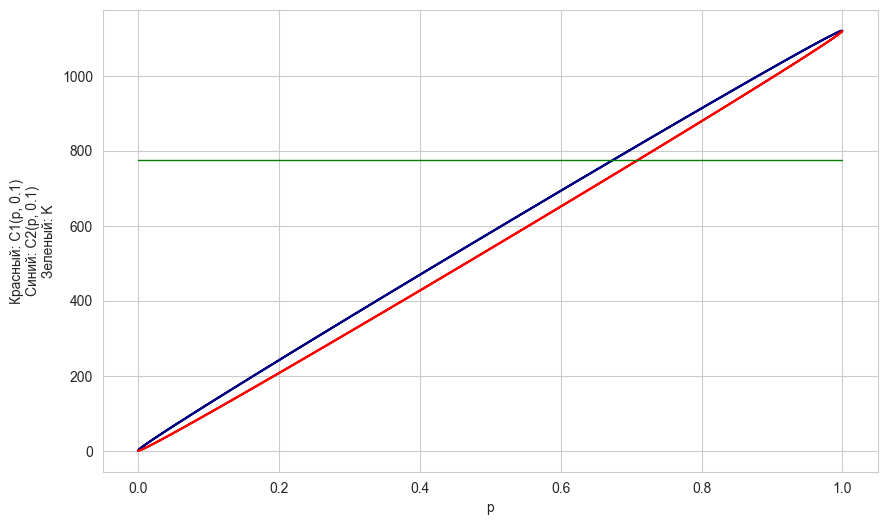

In [36]:
# График. Симметричные оценки Клоппера - Пирсона.

sb.set_style('whitegrid')
plt.figure(figsize=(10, 6))

px = np.arange(0, 1, 0.0001)
y1 = sp.stats.binom.ppf(0.9, n * k, px)
y2 = sp.stats.binom.ppf(0.1, n * k, px)

plt.plot(px, y1, color = 'navy')
plt.plot(px, y2, color = 'red')
plt.step([0,1],[K,K], linewidth = 1, color = "green")

plt.xlabel('p')
plt.ylabel('Красный: C1(p, 0.1)\nСиний: C2(p, 0.1)\nЗеленый: K')
plt.show()

In [37]:
# Таблица. Симметричные оценки Клоппера - Пирсона.

alpha1 = 0.1
p_down1 = sp.special.betaincinv(K, n * k - K + 1, alpha1 / 2)
p_up1 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha1 / 2))


alpha2 = 0.05
p_down2 = sp.special.betaincinv(K, n * k - K + 1, alpha2 / 2)
p_up2 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha2 / 2))


alpha3 = 0.02
p_down3 = sp.special.betaincinv(K, n * k - K + 1, alpha3 / 2)
p_up3 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha3 / 2))

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_down", p_down1, p_down2, p_down3,
     "p_up", p_up1, p_up2, p_up3])
print("Симметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p")
print_table(th, td)
print("Истинное значение p = 0.7 лежит в промежутке от p_down до p_up для разных alpha")

Симметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p
+--------+--------------------+--------------------+--------------------+
| alpha  |        0.1         |        0.05        |        0.02        |
+--------+--------------------+--------------------+--------------------+
| p_down | 0.6684693055083881 | 0.6640008865365506 | 0.6587813221531077 |
|  p_up  | 0.7147093202373498 | 0.7189153039387687 | 0.7237730818835137 |
+--------+--------------------+--------------------+--------------------+
Истинное значение p = 0.7 лежит в промежутке от p_down до p_up для разных alpha


In [38]:
# Приближенные доверительные интервалы по ЦПТ

par = K / (k * n)
av = K / n

alpha1 = 0.1
alpha2 = 0.05
alpha3 = 0.02

u1 = sp.stats.norm.ppf(1 - alpha1 / 2)
u2 = sp.stats.norm.ppf(1 - alpha2 / 2)
u3 = sp.stats.norm.ppf(1 - alpha3 / 2)

pl1 = (av - u1 * np.sqrt(k * par * (1 - par) / n)) / k
pr1 = (av + u1 * np.sqrt(k * par * (1 - par) / n)) / k

pl2 = (av - u2 * np.sqrt(k * par * (1 - par) / n)) / k
pr2 = (av + u2 * np.sqrt(k * par * (1 - par) / n)) / k

pl3 = (av - u3 * np.sqrt(k * par * (1 - par) / n)) / k
pr3 = (av + u3 * np.sqrt(k * par * (1 - par) / n)) / k

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_left", pl1, pl2, pl3, " p_right", pr1, pr2, pr3])
print("Приближенные доверительные интервалы для p (по ЦПТ)")
print_table(th, td)
print("Истинное значение p = 0.7 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ")

Приближенные доверительные интервалы для p (по ЦПТ)
+----------+--------------------+--------------------+--------------------+
|  alpha   |        0.1         |        0.05        |        0.02        |
+----------+--------------------+--------------------+--------------------+
|  p_left  | 0.6692729207192777 | 0.6649258566276223 | 0.6598714551728487 |
|  p_right | 0.7146556507092937 | 0.7190027148009491 | 0.7240571162557227 |
+----------+--------------------+--------------------+--------------------+
Истинное значение p = 0.7 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ


In [39]:
# Таблица вероятностей


prob_pl1 = bernuliProbability(pl1)
cumulativeProb_pl1 = cumulativeProbability(prob_pl1)

prob_pr1 = bernuliProbability(pr1)
cumulativeProb_pr1 = cumulativeProbability(prob_pr1)

prob_p = bernuliProbability(0.7)
cumulativeProb_p = cumulativeProbability(prob_p)

print ("Для pl1 = ", pl1)
th = ["pl1", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_pl1, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_pl1, 4))
print_table(th, td)

print ("Для pr1 = ", pr1)
th = ["pr1", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_pr1, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_pr1, 4))
print_table(th, td)

th = ["p = 0.7", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_p, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_p, 4))
print_table(th, td)

Для pl1 =  0.6692729207192777
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|               pl1               |   0    |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Вероятность по формуле Бернулли | 0.0001 | 0.0023 | 0.0164 | 0.0664 | 0.168  | 0.272  | 0.2752 | 0.1591 | 0.0403 |
|     Кумулятивная вероятность    | 0.0001 | 0.0025 | 0.0189 | 0.0853 | 0.2533 | 0.5254 | 0.8006 | 0.9597 |  1.0   |
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
Для pr1 =  0.7146556507092937
+---------------------------------+-----+--------+--------+--------+--------+--------+--------+--------+-------+
|               pr1               |  0  |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8   |
+-----------

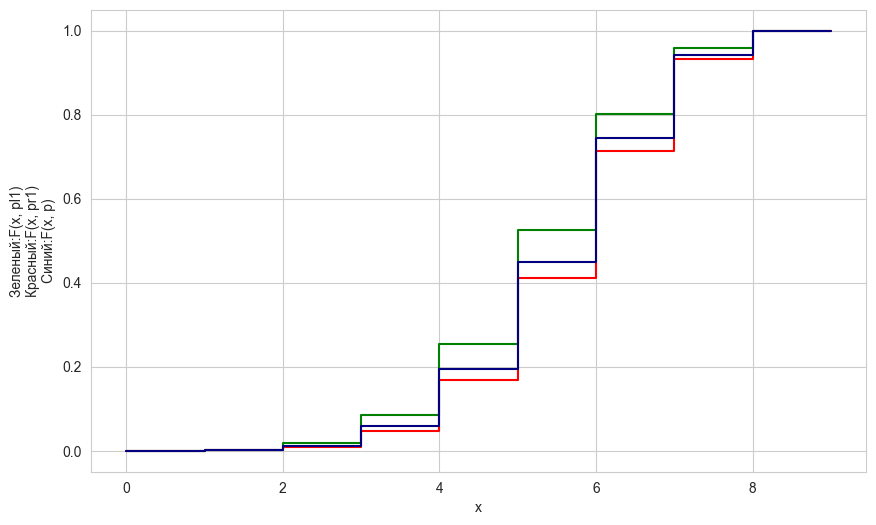

In [40]:
# График. Совмещенные функции распределения

plt.figure(figsize=(10,6))
rg = np.arange(0,10,1)

plt.step(rg, [0] + cumulativeProb_pl1.tolist(), color = 'green')
plt.step(rg, [0] + cumulativeProb_pr1.tolist(), color = 'red')
plt.step(rg, [0] + cumulativeProb_p.tolist(), color = 'navy')

plt.xlabel("x")
plt.ylabel("Зеленый:F(x, pl1)\nКрасный:F(x, pr1)\nСиний:F(x, p)")
plt.show()